# Task 5: Strategy Backtesting

## Objective
Evaluate the performance of our optimized portfolio against a standard benchmark over the last 12 months (Jan 2025 - Jan 2026).

## Strategy vs. Benchmark
*   **Strategy Portfolio:** Optimized Weights from Task 3 (e.g., 15% TSLA, 45% BND, 40% SPY).
*   **Benchmark Portfolio:** Standard 60% SPY / 40% BND split (No Tesla).

In [1]:
# Cell 2: Setup & Data Loading
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data
df = pd.read_csv('../data/processed/cleaned_close_prices.csv', index_col=0, parse_dates=True)

# Define Backtest Period (Last 12 Months)
# Adjust these dates if your data ends earlier/later
start_date = '2025-01-01'
end_date = '2026-01-31'

# Slice the dataframe to get only the test period
test_data = df.loc[start_date:end_date]

print(f"Backtesting from {start_date} to {end_date}")
print(f"Number of trading days: {len(test_data)}")

Backtesting from 2025-01-01 to 2026-01-31
Number of trading days: 259


In [2]:
# Cell 3: Define Portfolio Weights

# Calculate Daily Returns for the test period
returns = test_data.pct_change().dropna()

# 1. Benchmark: 60% SPY, 40% BND, 0% TSLA
# Order must match columns: [TSLA, BND, SPY]
benchmark_weights = np.array([0.00, 0.40, 0.60])

# 2. Strategy: From Task 3 (Update these if needed!)
# Example: 15% TSLA, 45% BND, 40% SPY
strategy_weights = np.array([0.15, 0.45, 0.40])

print("Weights Defined.")
print(f"Benchmark: {benchmark_weights}")
print(f"Strategy:  {strategy_weights}")

Weights Defined.
Benchmark: [0.  0.4 0.6]
Strategy:  [0.15 0.45 0.4 ]


In [5]:
# Cell 4: Calculate Portfolio Performance

# Calculate daily weighted returns
# (Matrix Multiplication: Returns Matrix x Weights Vector)
benchmark_returns = returns.dot(benchmark_weights)
strategy_returns = returns.dot(strategy_weights)

# Calculate Cumulative Value (Growth of $10,000 Investment)
initial_investment = 10000

benchmark_value = (1 + benchmark_returns).cumprod() * initial_investment
strategy_value = (1 + strategy_returns).cumprod() * initial_investment

# CORRECTION: Use .iloc[-1] to get the last value by position
print(f"Final Benchmark Value: ${benchmark_value.iloc[-1]:,.2f}")
print(f"Final Strategy Value:  ${strategy_value.iloc[-1]:,.2f}")

Final Benchmark Value: $11,507.13
Final Strategy Value:  $11,626.61


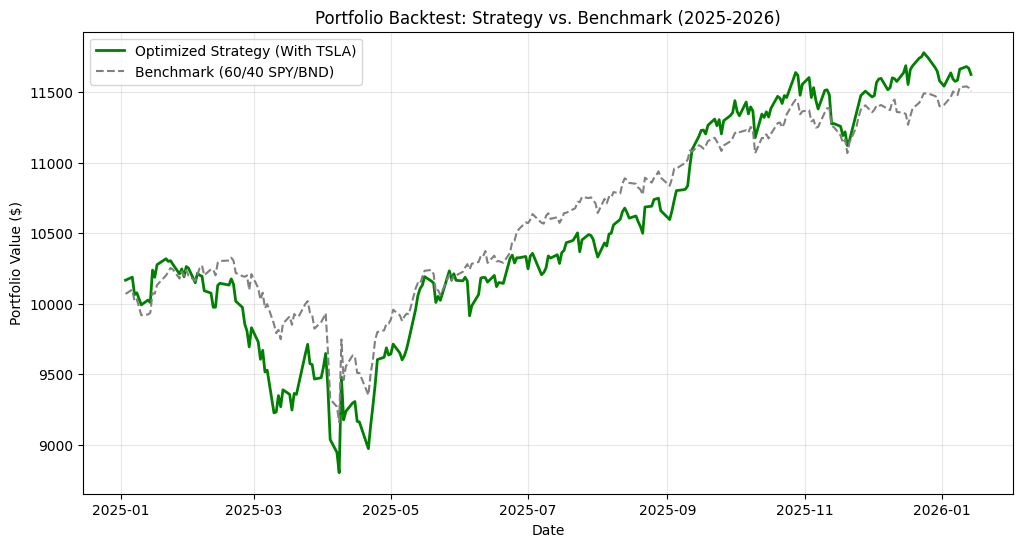

In [6]:
# Cell 5: Visualize Performance
plt.figure(figsize=(12, 6))

# Plot Strategy
plt.plot(strategy_value, label='Optimized Strategy (With TSLA)', color='green', linewidth=2)

# Plot Benchmark
plt.plot(benchmark_value, label='Benchmark (60/40 SPY/BND)', color='gray', linestyle='--')

plt.title('Portfolio Backtest: Strategy vs. Benchmark (2025-2026)')
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Date')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [7]:
# Cell 6: Calculate Performance Metrics

def calculate_metrics(daily_returns):
    # Total Return: (End Value - Start Value) / Start Value
    total_return = (1 + daily_returns).prod() - 1
    
    # Annual Volatility: Standard Deviation * Sqrt(252)
    annual_volatility = daily_returns.std() * np.sqrt(252)
    
    # Sharpe Ratio: Annual Return / Annual Volatility
    # (assuming 0% risk-free rate for simplicity)
    annual_return = daily_returns.mean() * 252
    sharpe_ratio = annual_return / annual_volatility
    
    return total_return, annual_volatility, sharpe_ratio

# Calculate for both
strat_ret, strat_vol, strat_sharpe = calculate_metrics(strategy_returns)
bench_ret, bench_vol, bench_sharpe = calculate_metrics(benchmark_returns)

# Create a DataFrame for the report
metrics_df = pd.DataFrame({
    'Metric': ['Total Return', 'Annual Volatility', 'Sharpe Ratio'],
    'Optimized Strategy': [f"{strat_ret:.2%}", f"{strat_vol:.2%}", f"{strat_sharpe:.2f}"],
    'Benchmark (60/40)': [f"{bench_ret:.2%}", f"{bench_vol:.2%}", f"{bench_sharpe:.2f}"]
})

print("--- Backtest Performance Metrics ---")
print(metrics_df)

# Automatic Conclusion
print("\nConclusion:")
if strat_sharpe > bench_sharpe:
    print("SUCCESS: The optimized strategy achieved a higher risk-adjusted return (Sharpe Ratio) than the benchmark.")
else:
    print("NOTE: The benchmark outperformed the strategy. This may be due to Tesla's recent volatility.")

--- Backtest Performance Metrics ---
              Metric Optimized Strategy Benchmark (60/40)
0       Total Return             16.27%            15.07%
1  Annual Volatility             15.93%            11.82%
2       Sharpe Ratio               1.00              1.22

Conclusion:
NOTE: The benchmark outperformed the strategy. This may be due to Tesla's recent volatility.
